In [58]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [59]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [60]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [61]:
# Define class names for CIFAR-10 dataset
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [62]:
# Define function to plot sample images
def plot_sample(X, y, index):
    """Plot a sample image from the dataset."""
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index, 0]])  # Set the label of the image
    plt.show()

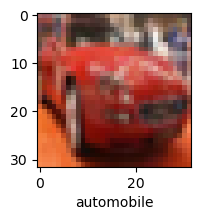

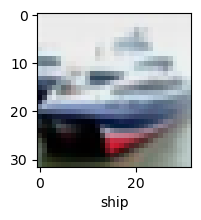

In [63]:
# Display sample images from the training and testing sets
plot_sample(x_train, y_train, 5)  # Display a sample image from the training set
plot_sample(x_test, y_test, 1)    # Display a sample image from the testing set

In [64]:
# Fully Connected Neural Network (ANN) Model
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [65]:
# Compile ANN model
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [66]:
# Train ANN model
ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.3010 - loss: 1.9410
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.4195 - loss: 1.6433
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.4518 - loss: 1.5458
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.4747 - loss: 1.4854
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.4957 - loss: 1.4383


In [67]:
# Evaluate ANN model
ann.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4694 - loss: 1.4641


[1.4678192138671875, 0.4699000120162964]

In [68]:
# Make predictions using ANN model
y_pred_ann = np.argmax(ann.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [69]:
# Print classification report for ANN model
print('ANN Classification Report:')
print(classification_report(y_test, y_pred_ann))

ANN Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.51      0.53      1000
           1       0.47      0.76      0.58      1000
           2       0.45      0.21      0.29      1000
           3       0.35      0.32      0.34      1000
           4       0.41      0.48      0.44      1000
           5       0.34      0.47      0.39      1000
           6       0.62      0.36      0.46      1000
           7       0.55      0.58      0.56      1000
           8       0.50      0.72      0.59      1000
           9       0.66      0.28      0.39      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000



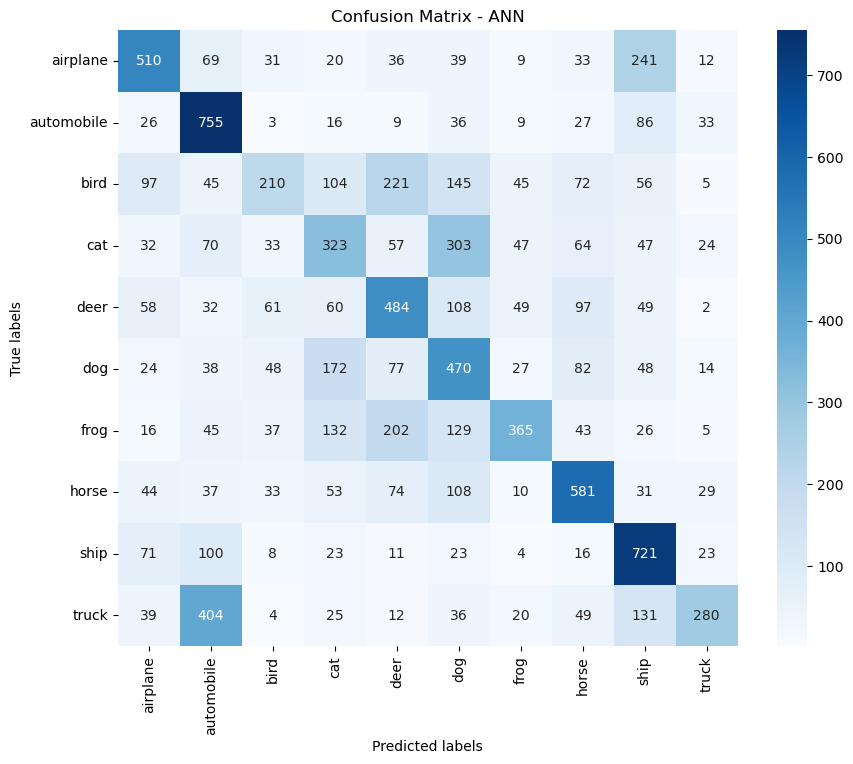

In [70]:
# Plot confusion matrix for ANN model
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_ann), annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - ANN')
plt.show()

In [71]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the Sequential model
cnn = Sequential()

# Add the first convolutional layer
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))

# Add the first max pooling layer
cnn.add(MaxPooling2D(pool_size=(2, 3)))

# Add the second convolutional layer
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Add the second max pooling layer
cnn.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for the fully connected layers
cnn.add(Flatten())

# Add the first fully connected layer
cnn.add(Dense(units=64, activation='relu'))

# Add the output fully connected layer
cnn.add(Dense(units=10, activation='softmax'))

# Compile the model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
cnn.summary()

C:\Users\bubei\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 15, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 13, 8, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │        98,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,410 (462.54 KB)

 Trainable params: 118,410 (462.54 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
# Compile the CNN model
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [73]:
# Train the CNN model
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3854 - loss: 1.6875
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5924 - loss: 1.1577
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6597 - loss: 0.9873
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6867 - loss: 0.8959
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7140 - loss: 0.8244
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7330 - loss: 0.7599
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7545 - loss: 0.7075
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7711 - loss: 0.6530
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7913 - loss: 0.6019
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8006 - loss: 0.5651


In [74]:
# Evaluate the CNN model on the test data
test_loss, test_accuracy = cnn.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7030 - loss: 0.9196
Test Loss: 0.922239363193512
Test Accuracy: 0.7023000121116638


In [75]:
# Make predictions using CNN model
y_pred_cnn = np.argmax(cnn.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [76]:
# Print classification report for CNN model
print('CNN Classification Report:')
print(classification_report(y_test, y_pred_cnn))

CNN Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.69      0.74      1000
           1       0.82      0.80      0.81      1000
           2       0.60      0.61      0.60      1000
           3       0.59      0.41      0.48      1000
           4       0.65      0.69      0.67      1000
           5       0.71      0.48      0.58      1000
           6       0.65      0.87      0.75      1000
           7       0.69      0.79      0.73      1000
           8       0.81      0.84      0.82      1000
           9       0.71      0.84      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



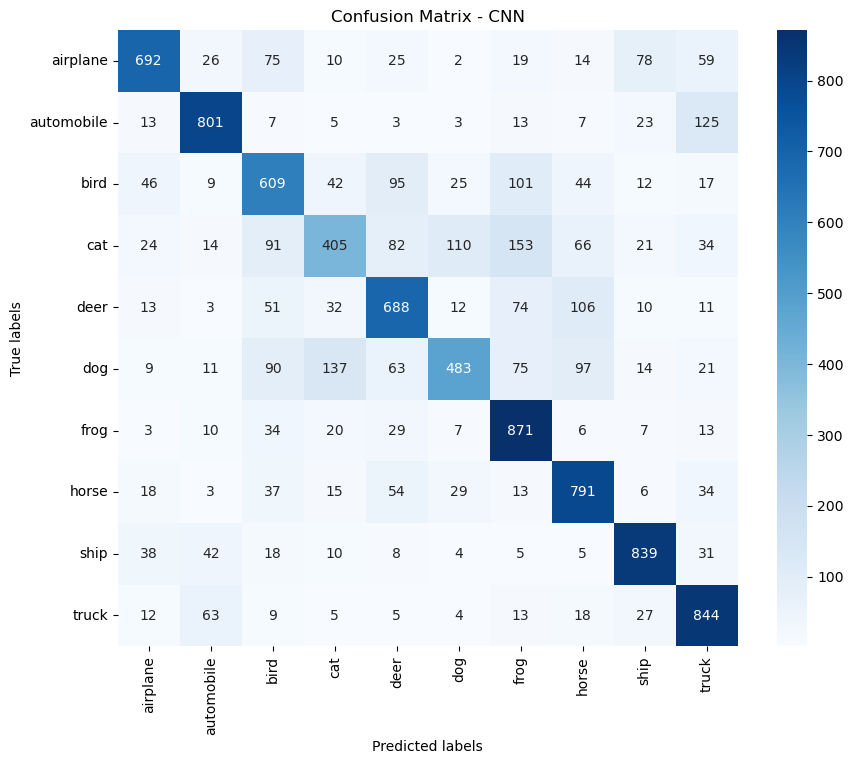

In [77]:
# Plot confusion matrix for CNN model
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_cnn), annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - CNN')
plt.show()

In [78]:
# Save the trained model
cnn.save('cifar10_cnn_model.h5')

In [79]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('classification report: \n', classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.56      0.51      0.53      1000
           1       0.47      0.76      0.58      1000
           2       0.45      0.21      0.29      1000
           3       0.35      0.32      0.34      1000
           4       0.41      0.48      0.44      1000
           5       0.34      0.47      0.39      1000
           6       0.62      0.36      0.46      1000
           7       0.55      0.58      0.56      1000
           8       0.50      0.72      0.59      1000
           9       0.66      0.28      0.39      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000

